In [1]:
import keras
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf

path = 'D:/fruits_unzipped/fruits-360/fruits_reduced_2/Training' #Training file

#Normalize images - divide by 255
train_datagen = ImageDataGenerator(rescale=1. / 255)

#Resize images, if needed
train = train_datagen.flow_from_directory(path, 
                                          target_size=(256, 256), 
                                          batch_size= 512, 
                                          #due to less computing power I used 512 images per epoch, you may change it to your requirements(Use the data set size here)
                                          class_mode=None)

#Convert from RGB to Lab
"""
by iterating on each image, we convert the RGB to Lab. 
Think of LAB image as a grey image in L channel and all color info stored in A and B channels. 
The input to the network will be the L channel, so we assign L channel to X vector. 
And assign A and B to Y.

"""
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) #A and B values range from -127 to 128, 
      #so we divide the values by 128 to restrict values to between -1 and 1.
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) #dimensions to be the same for X and Y
print(X.shape)
print(Y.shape)


#Encoder

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

#Decoder
#Decoder
#Note: For the last layer we use tanh instead of Relu. 
#This is because we are colorizing the image in this layer using 2 filters, A and B.
#A and B values range between -1 and 1 so tanh (or hyperbolic tangent) is used
#as it also has the range between -1 and 1. 
#Other functions go from 0 to 1.
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()


history = model.fit(X,Y, validation_split= 0.1,epochs= 100, batch_size=16)

model.save('D:/fruits_unzipped/models/autoencoder100_fruits_6485.model')


Found 6485 images belonging to 12 classes.
(512, 256, 256, 1)
(512, 256, 256, 2)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 256)       295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 512)       1180160   
_________________________________________

29/29 [==============================] - 192s 7s/step - loss: 4.4563e-04 - accuracy: 0.8724 - val_loss: 8.9384e-04 - val_accuracy: 0.8779
Epoch 96/100
29/29 [==============================] - 197s 7s/step - loss: 4.5884e-04 - accuracy: 0.8642 - val_loss: 8.3240e-04 - val_accuracy: 0.8626
Epoch 97/100
29/29 [==============================] - 231s 8s/step - loss: 4.2854e-04 - accuracy: 0.8766 - val_loss: 8.1579e-04 - val_accuracy: 0.8668
Epoch 98/100
29/29 [==============================] - 205s 7s/step - loss: 4.8440e-04 - accuracy: 0.8729 - val_loss: 9.0575e-04 - val_accuracy: 0.8546
Epoch 99/100
29/29 [==============================] - 236s 8s/step - loss: 4.4903e-04 - accuracy: 0.8614 - val_loss: 8.1952e-04 - val_accuracy: 0.8684
Epoch 100/100
29/29 [==============================] - 200s 7s/step - loss: 4.0101e-04 - accuracy: 0.8772 - val_loss: 8.8368e-04 - val_accuracy: 0.8814
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied auto

'\ntf.keras.models.load_model(\n    \'other_files/colorize_autoencoder300.model\',\n    custom_objects=None,\n    compile=True)\n\nimg1_color=[]\n\nimg1=img_to_array(load_img(\'images/sunset.png\'))\nimg1 = resize(img1 ,(256,256))\nimg1_color.append(img1)\n\nimg1_color = np.array(img1_color, dtype=float)\nimg1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]\nimg1_color = img1_color.reshape(img1_color.shape+(1,))\n\noutput1 = model.predict(img1_color)\noutput1 = output1*128\n\nresult = np.zeros((256, 256, 3))\nresult[:,:,0] = img1_color[0][:,:,0]\nresult[:,:,1:] = output1[0]\nimsave("result.png", lab2rgb(result))\n'

In [2]:

import matplotlib.pyplot as plt 
import numpy as np 

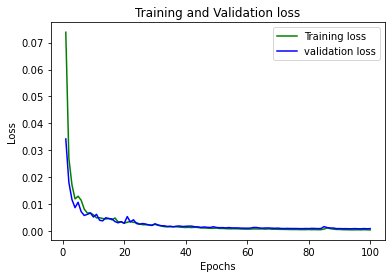

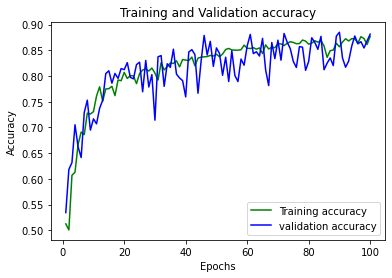

<Figure size 432x288 with 0 Axes>

In [10]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('loss100.png',dpi = 400)

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('accuracy100.png',dpi = 400)

Text(0.5, 1.0, 'Original Image')

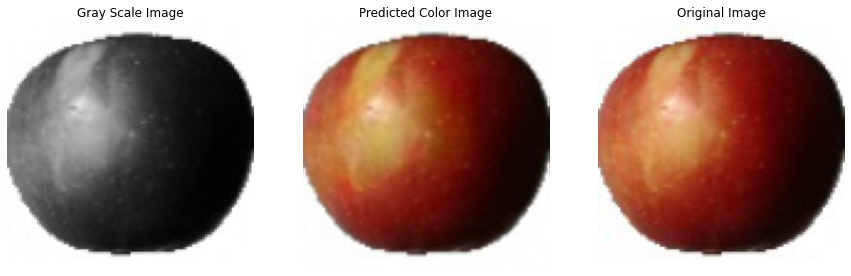

In [4]:



import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import img_to_array, load_img
from skimage.transform import resize
from skimage.io import imsave, imshow, imread
import numpy as np
from skimage.color import rgb2lab, lab2rgb, rgb2gray
import os

 

model = tf.keras.models.load_model('D:/fruits_unzipped/models/autoencoder100_fruits_6485.model',
                                   custom_objects=None,
                                   compile = True)

img1_color=[]

img1=img_to_array(load_img('D:/fruits_unzipped/fruits-360/testing/Apple Braeburn/3_100.jpg'))

img1 = resize(img1 ,(256,256))
img1_color.append(img1)


image = imread('D:/fruits_unzipped/fruits-360/testing/Apple Braeburn/3_100.jpg')
bw_image = rgb2gray(image)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
#plt.imshow(result)
out_image = (lab2rgb(result))

fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(bw_image, cmap ='gray') #black and white 
plt.axis("off")
plt.title("Gray Scale Image")
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(out_image) #predicted color image
plt.axis("off")
plt.title("Predicted Color Image")
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(image) #original color image
plt.axis("off")
plt.title("Original Image")
#plt.savefig("Apple_output")


Text(0.5, 1.0, 'Original Image')

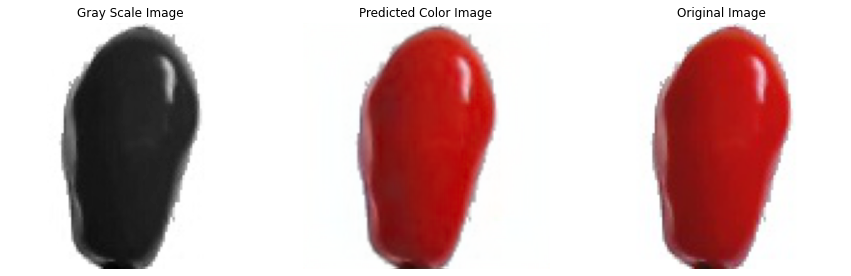

In [1]:



import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import img_to_array, load_img
from skimage.transform import resize
from skimage.io import imsave, imshow, imread
import numpy as np
from skimage.color import rgb2lab, lab2rgb, rgb2gray
import os
###########################################################
#Load saved model and test on images.
model = tf.keras.models.load_model('D:/fruits_unzipped/models/autoencoder100_fruits_6485.model',
                                   custom_objects=None,
                                   compile = True)

img1_color=[]

img1=img_to_array(load_img('D:/fruits_unzipped/fruits-360/testing/Tomato 2/102_100.jpg'))

img1 = resize(img1 ,(256,256))
img1_color.append(img1)


image = imread('D:/fruits_unzipped/fruits-360/testing/Tomato 2/102_100.jpg')
bw_image = rgb2gray(image)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
#plt.imshow(result)
out_image = (lab2rgb(result))

fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(bw_image, cmap='gray') #black and white 
plt.axis("off")
plt.title("Gray Scale Image")
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(out_image) #predicted color image
plt.axis("off")
plt.title("Predicted Color Image")
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(image) #original color image
plt.axis("off")
plt.title("Original Image")
#plt.savefig("Apple_output")


#imsave("result1.png", lab2rgb(result))


Text(0.5, 1.0, 'Original Image')

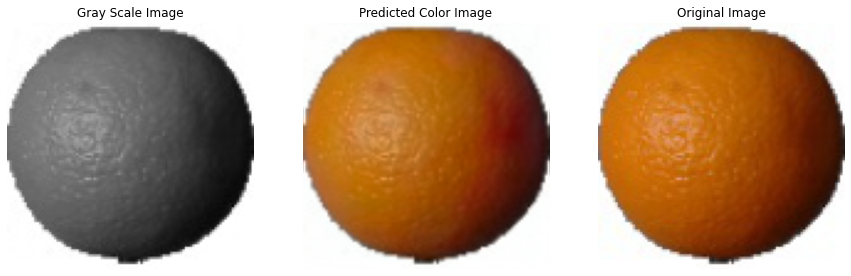

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import img_to_array, load_img
from skimage.transform import resize
from skimage.io import imsave, imshow, imread
import numpy as np
from skimage.color import rgb2lab, lab2rgb, rgb2gray
import os
###########################################################
#Load saved model and test on images.


model = tf.keras.models.load_model('D:/fruits_unzipped/models/autoencoder100_fruits_6485.model',
                                   custom_objects=None,
                                   compile = True)

img1_color=[]

img1=img_to_array(load_img('D:/fruits_unzipped/fruits-360/testing/Orange/50_100.jpg'))

img1 = resize(img1 ,(256,256))
img1_color.append(img1)


image = imread('D:/fruits_unzipped/fruits-360/testing/Orange/50_100.jpg')
bw_image = rgb2gray(image)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
#plt.imshow(result)
out_image = (lab2rgb(result))

fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(bw_image, cmap='gray') #black and white 
plt.axis("off")
plt.title("Gray Scale Image")
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(out_image) #predicted color image
plt.axis("off")
plt.title("Predicted Color Image")
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(image) #original color image
plt.axis("off")
plt.title("Original Image")



Text(0.5, 1.0, 'Original Image')

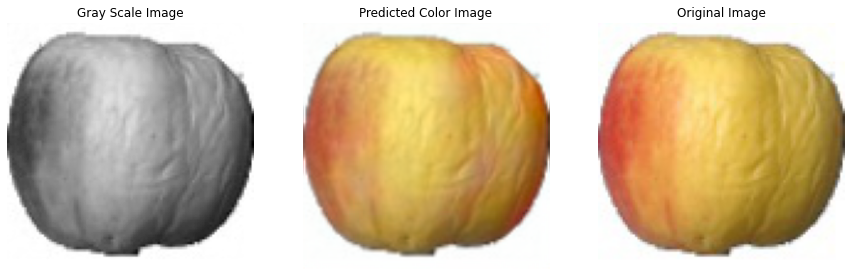

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import img_to_array, load_img
from skimage.transform import resize
from skimage.io import imsave, imshow, imread
import numpy as np
from skimage.color import rgb2lab, lab2rgb, rgb2gray
import os
###########################################################
 

model = tf.keras.models.load_model('D:/fruits_unzipped/models/autoencoder100_fruits_6485.model',
                                   custom_objects=None,
                                   compile = True)

img1_color=[]

img1=img_to_array(load_img('D:/fruits_unzipped/fruits-360/testing/Apple Red Yellow/97_100.jpg'))

img1 = resize(img1 ,(256,256))
img1_color.append(img1)


image = imread('D:/fruits_unzipped/fruits-360/testing/Apple Red Yellow/97_100.jpg')
bw_image = rgb2gray(image)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
#plt.imshow(result)
out_image = (lab2rgb(result))

fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(bw_image, cmap='gray') #black and white 
plt.axis("off")
plt.title("Gray Scale Image")
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(out_image) #predicted color image
plt.axis("off")
plt.title("Predicted Color Image")
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(image) #original color image
plt.axis("off")
plt.title("Original Image")



Text(0.5, 1.0, 'Original Image')

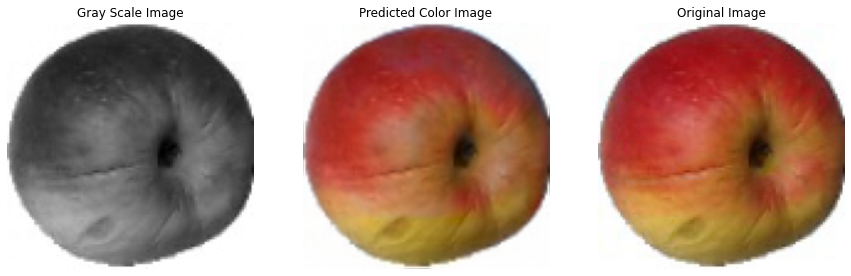

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import img_to_array, load_img
from skimage.transform import resize
from skimage.io import imsave, imshow, imread
import numpy as np
from skimage.color import rgb2lab, lab2rgb, rgb2gray
import os
###########################################################


model = tf.keras.models.load_model('D:/fruits_unzipped/models/autoencoder50_fruits_6485.model',
                                   custom_objects=None,
                                   compile = True)

img1_color=[]

img1=img_to_array(load_img('D:/fruits_unzipped/fruits-360/testing/Apple Red Yellow/r_3_100.jpg'))

img1 = resize(img1 ,(256,256))
img1_color.append(img1)


image = imread('D:/fruits_unzipped/fruits-360/testing/Apple Red Yellow/r_3_100.jpg')
bw_image = rgb2gray(image)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
#plt.imshow(result)
out_image1 = (lab2rgb(result))

fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(bw_image, cmap='gray') #black and white 
plt.axis("off")
plt.title("Gray Scale Image")
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(out_image1) #predicted color image
plt.axis("off")
plt.title("Predicted Color Image")
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(image) #original color image
plt.axis("off")
plt.title("Original Image")

Text(0.5, 1.0, 'Original Image')

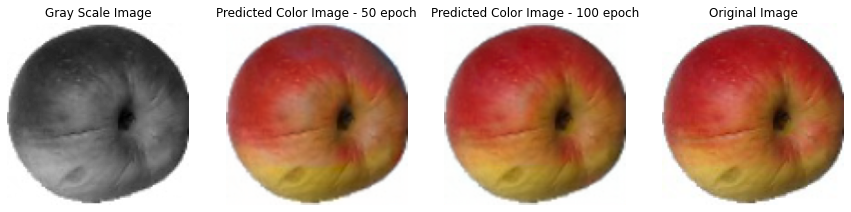

In [11]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import img_to_array, load_img
from skimage.transform import resize
from skimage.io import imsave, imshow, imread
import numpy as np
from skimage.color import rgb2lab, lab2rgb, rgb2gray
import os
###########################################################


model = tf.keras.models.load_model('D:/fruits_unzipped/models/autoencoder100_fruits_6485.model',
                                   custom_objects=None,
                                   compile = True)

img1_color=[]

img1=img_to_array(load_img('D:/fruits_unzipped/fruits-360/testing/Apple Red Yellow/r_3_100.jpg'))

img1 = resize(img1 ,(256,256))
img1_color.append(img1)


image = imread('D:/fruits_unzipped/fruits-360/testing/Apple Red Yellow/r_3_100.jpg')
bw_image = rgb2gray(image)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
#plt.imshow(result)
out_image = (lab2rgb(result))

fig = plt.figure(figsize = (15,15))
ax0 = fig.add_subplot(1,4,1)
ax0.imshow(bw_image, cmap='gray') #black and white 
plt.axis("off")
plt.title("Gray Scale Image")
ax1 = fig.add_subplot(1,4,2)
ax1.imshow(out_image1) #predcited color image 50
plt.axis("off")
plt.title("Predicted Color Image - 50 epoch")
ax2 = fig.add_subplot(1,4,3)
ax2.imshow(out_image) #predicted color image 100
plt.axis("off")
plt.title("Predicted Color Image - 100 epoch")
ax3 = fig.add_subplot(1,4,4)
ax3.imshow(image) #original color image
plt.axis("off")
plt.title("Original Image")



Text(0.5, 1.0, 'Original Image')

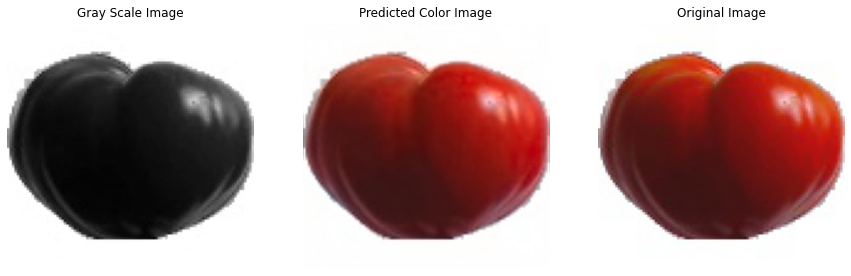

In [12]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import img_to_array, load_img
from skimage.transform import resize
from skimage.io import imsave, imshow, imread
import numpy as np
from skimage.color import rgb2lab, lab2rgb, rgb2gray
import os
###########################################################


model = tf.keras.models.load_model('D:/fruits_unzipped/models/autoencoder50_fruits_6485.model',
                                   custom_objects=None,
                                   compile = True)

img1_color=[]

img1=img_to_array(load_img('D:/fruits_unzipped/fruits-360/testing/Tomato 3/33_100.jpg'))

img1 = resize(img1 ,(256,256))
img1_color.append(img1)


image = imread('D:/fruits_unzipped/fruits-360/testing/Tomato 3/33_100.jpg')
bw_image = rgb2gray(image)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
#plt.imshow(result)
out_image1 = (lab2rgb(result))

fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(bw_image, cmap='gray') #black and white 
plt.axis("off")
plt.title("Gray Scale Image")
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(out_image1) #predicted color image
plt.axis("off")
plt.title("Predicted Color Image")
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(image) #original color image
plt.axis("off")
plt.title("Original Image")



Text(0.5, 1.0, 'Original Image')

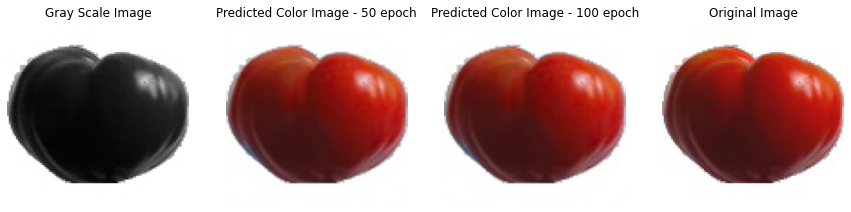

In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import img_to_array, load_img
from skimage.transform import resize
from skimage.io import imsave, imshow, imread
import numpy as np
from skimage.color import rgb2lab, lab2rgb, rgb2gray
import os
###########################################################


model = tf.keras.models.load_model('D:/fruits_unzipped/models/autoencoder100_fruits_6485.model',
                                   custom_objects=None,
                                   compile = True)

img1_color=[]

img1=img_to_array(load_img('D:/fruits_unzipped/fruits-360/testing/Tomato 3/33_100.jpg'))

img1 = resize(img1 ,(256,256))
img1_color.append(img1)


image = imread('D:/fruits_unzipped/fruits-360/testing/Tomato 3/33_100.jpg')
bw_image = rgb2gray(image)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
#plt.imshow(result)
out_image = (lab2rgb(result))

fig = plt.figure(figsize = (15,15))
ax0 = fig.add_subplot(1,4,1)
ax0.imshow(bw_image, cmap='gray') #black and white 
plt.axis("off")
plt.title("Gray Scale Image")
ax1 = fig.add_subplot(1,4,2)
ax1.imshow(out_image1) #predcited color image 50
plt.axis("off")
plt.title("Predicted Color Image - 50 epoch")
ax2 = fig.add_subplot(1,4,3)
ax2.imshow(out_image) #predicted color image 100
plt.axis("off")
plt.title("Predicted Color Image - 100 epoch")
ax3 = fig.add_subplot(1,4,4)
ax3.imshow(image) #original color image
plt.axis("off")
plt.title("Original Image")


